# 전국육교정보표준데이터

- 내진설계 된 육교 퍼센트
- 안전등급별 육교 갯수, 비율
- 육교가 만들어진 연도 와 장애인 편의 시설간 상관관계

- 길이가 가장 긴 육교 (육교연장)
- 가장 튼튼한 육교 (허용통행하중)
- 가장 높은 육교 (통행제한 높이)
- 육교연장, 허용통행하중, 통행제한 높이에 대해 최대, 최소, 평균, 표준편차 알아보기



In [1]:
def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

raw_data = []
with open('전국육교정보표준데이터.csv', encoding = 'cp949') as f:
    for line in f:
        raw_data.append(my_split(line[:-1]))
        

In [3]:
print(raw_data)

[['육교명', '도로종류', '도로노선번호', '도로노선명', '소재지도로명주소', '위도', '경도', '육교연장', '육교높이', '허용통행하중', '통행제한높이', '육교폭', '난간높이', '조명개수', '장애인편의시설설치여부', '장애인편의시설종류', '장애인편의시설수량', '부대시설종류', '부대시설수량', '육교준공일자', '내진설계적용여부', '안전등급', '사용제한구분', '육교보수보강내역', '최종안전점검유형', '최종안전점검일자', '관리기관명', '데이터기준일자', '제공기관코드', '제공기관명'], ['우신초교 앞 보도육교', '시도', '147', '신길로', '서울특별시 영등포구 신길로 190', '37.509263', '126.910801', '23', '4.7', '', '4.5', '3.4', '1', '8', 'Y', '점자블록+핸드레일 촉지판', '24', '', '', '1980-09-18', ' ', '보통', '제한없음', '', '정기점검', '2022-04-16', '서울특별시 영등포구청', '2022-07-04', '3180000', '서울특별시 영등포구'], ['영등포역 횡단 보도육교', '기타', '없음', '경인선', '서울특별시 영등포구 경인로94길 7', '37.513895', '126.903695', '83', '', '0.5', '5.6', '3.2', '1.8', '14', 'Y', '엘리베이터', '', '', '', '1974-12-01', ' ', '보통', '제한없음', '', '정기점검', '2022-04-16', '서울특별시 영등포구청', '2022-07-04', '3180000', '서울특별시 영등포구'], ['문래 보도육교', '시도', '245', '서부간선도로', '서울특별시 영등포구 문래로4길 4', '37.520246', '126.882018', '40', '5.1', '0.5', '4.5', '4', '1.2', '', 'Y', '엘리베이터', '', '', '', '2006

In [4]:
for i in enumerate(raw_data[0]):
    print(i)

(0, '육교명')
(1, '도로종류')
(2, '도로노선번호')
(3, '도로노선명')
(4, '소재지도로명주소')
(5, '위도')
(6, '경도')
(7, '육교연장')
(8, '육교높이')
(9, '허용통행하중')
(10, '통행제한높이')
(11, '육교폭')
(12, '난간높이')
(13, '조명개수')
(14, '장애인편의시설설치여부')
(15, '장애인편의시설종류')
(16, '장애인편의시설수량')
(17, '부대시설종류')
(18, '부대시설수량')
(19, '육교준공일자')
(20, '내진설계적용여부')
(21, '안전등급')
(22, '사용제한구분')
(23, '육교보수보강내역')
(24, '최종안전점검유형')
(25, '최종안전점검일자')
(26, '관리기관명')
(27, '데이터기준일자')
(28, '제공기관코드')
(29, '제공기관명')


In [5]:
np_data = np.array(raw_data)

In [6]:
print(np_data.shape)

(1219, 30)


In [37]:
seismic_design = np_data[1:, 20]
filter1 = seismic_design != ' '
seismic_design = seismic_design[filter1]

In [40]:
y_n_list, pass1 = np.unique(seismic_design, return_counts = True)
tot = np.sum(pass1)
print(y_n_list)
print(pass1)
print('내진설계적용된 육교퍼센트:', pass1[1]*100/tot)
print('내진설계안된 육교퍼센트:', pass1[0]*100/tot)

['N' 'Y']
[695 166]
내진설계적용된 육교퍼센트: 19.279907084785133
내진설계안된 육교퍼센트: 80.72009291521486


In [74]:
safety_level = np_data[1:, 21]

In [79]:
pass2, counts = np.unique(safety_level, return_counts = True)

In [80]:
pass2 = np.expand_dims(pass2, 1)
counts = np.expand_dims(counts, 1)

cnt_percent = counts*100 / np.sum(counts)
cnt_percent2 = cnt_percent[:, np.newaxis]
jdata = np.concatenate((pass2,counts, cnt_percent), axis = 1)

total = np.sum(counts)
print(jdata)
filter1 = (np_data[:, 21] == '불량')
filter2 = (np_data[:, 21] == '우수')
print(np_data[filter1])
print(np_data[filter2])

print('안전등급 불량 퍼센트:', counts[2]*100/total)
print('안전등급 미흡 퍼센트:', counts[0]*100/total)
print('안전등급 보통 퍼센트:', counts[1]*100/total)
print('안전등급 양호 퍼센트:', counts[3]*100/total)
print('안전등급 우수 퍼센트:', counts[4]*100/total)

[['미흡' '25' '2.052545155993432']
 ['보통' '390' '32.01970443349754']
 ['불량' '1' '0.08210180623973727']
 ['양호' '795' '65.27093596059113']
 ['우수' '7' '0.5747126436781609']]
[['갈평 보도육교' '기타' '경부선' '경부선' '경기도 평택시 서정동 432-3' '37.05929603'
  '127.0533613' '50' '' '' '8.5' '2.3' '' '' 'N' '없음' '' '없음' '' '' 'N'
  '불량' '사용제한' '' '정밀점검' '2020-12-30' '경기도 평택시' '2022-06-13' '3910000'
  '경기도 평택시']]
[['명륜역 육교' '시도' '0' '중앙대로' '부산광역시 동래구 중앙대로 1414' '35.212111' '129.078911'
  '112' '4.5' '' '4.5' '3' '1.2' '' 'N' '없음' '' '' '' '2009-02-12' ' '
  '우수' '제한없음' '' '정기점검' '2022-09-29' '동래구청' '2022-11-14' '3300000'
  '부산광역시 동래구']
 ['금암공원 인도교' '지방도' '730' '쑥고개로' '전라북도 남원시 쑥고개로 41' '35.3978410614'
  '127.3800269564' '46' '8.5' '3.5' '4.8' '3.5' '1.5' '186' 'Y' '점자블록'
  '1' '엘리베이터+캐노피' '2' '2022-05-17' 'N' '우수' '제한없음' '없음' '정기점검'
  '2022-11-25' '전라북도 남원시청' '2022-11-29' '4700000' '전라북도 남원시']
 ['덕풍북로 보도육교' '시도' '188' '덕풍북로' '경기도 하남시 덕풍북로 100' '37.5543847'
  '127.2013921' '82.2' '' '' '4.5' '' '' '' 'Y' '엘리베이터+경사로

In [84]:
dist = np_data[1:, 7]

dist, counts = np.unique(dist, return_counts = True)
dist_sum = np.sum(counts[1:])

In [85]:
np_dist = np.asarray(dist[1:], np.float64)
sort_dist = np.sort(np_dist)[::-1]

In [86]:
weight = np_data[: ,  9]
height = np_data[: , 10]
print(weight)

['허용통행하중' '' '0.5' ... '' '' '']


In [87]:
height = np.unique(height[1:], return_counts = True)
weight = np.unique(weight[1:], return_counts = True)


In [88]:
print(weight[0][1])
print(height)

0
(array(['0', '1.4', '10', '13.3', '18', '2', '2.3', '2.5', '3', '3.3',
       '3.5', '3.8', '3.9', '30', '4', '4.1', '4.2', '4.3', '4.4', '4.5',
       '4.6', '4.7', '4.8', '4.9', '45', '5', '5.0', '5.1', '5.2', '5.3',
       '5.4', '5.5', '5.6', '5.7', '5.85', '50', '6', '6.1', '6.5', '6.7',
       '6.8', '7', '7.5', '8', '8.4', '8.5', '9', '9.2'], dtype='<U61'), array([ 30,   1,   5,   1,   1,   1,   1,   5,  11,   1,   1,   2,   1,
         3,  95,   1,  16,  28,   8, 496,  16,  29, 100,  10,   1, 225,
         2,  13,  12,   3,   4,  20,   2,   2,   1,   1,  16,   1,   3,
         1,   3,  29,   3,   5,   1,   4,   2,   1]))


In [89]:
np_weight = np.asarray(weight[0][2:], np.float64)
np_height = np.asarray(height[0][1:], np.float64)

In [90]:
print(np_weight)
print(np_height)

[  0.34    0.5    13.     13.5    15.      2.4   225.     25.      3.367
   3.5    43.2     5.      7.5  ]
[ 1.4  10.   13.3  18.    2.    2.3   2.5   3.    3.3   3.5   3.8   3.9
 30.    4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7   4.8   4.9  45.
  5.    5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.85 50.    6.
  6.1   6.5   6.7   6.8   7.    7.5   8.    8.4   8.5   9.    9.2 ]


In [91]:
sort_weight = np.sort(np_weight)[::-1]
sort_height = np.sort(np_height)[::-1]

In [92]:
print(sort_dist[0], sort_dist[-1])
print(sort_weight[0], sort_weight[-1])
print(sort_height[0], sort_height[-1])

693.6 5.3
225.0 0.34
50.0 1.4


In [93]:


dist_mean = np.mean(sort_dist)
weight_mean = np.mean(sort_weight)
height_mean = np.mean(sort_height)




dist_std = np.std(sort_dist)
weight_std = np.std(sort_weight)
height_std = np.std(sort_height)





In [96]:
print('길이 최소, 최대:', np.min(np_dist), np.max(np_dist))
print('하중 최소, 최대:', np.min(np_weight), np.max(np_weight))
print('높이 최소, 최대:', np.min(np_height), np.max(np_height))
print()
print('길이평균:', dist_mean)
print('하중평균:', weight_mean)
print('높이평균:', height_mean)
print()
print('길이표준편차:', dist_std)
print('하중표준편차:', weight_std)
print('높이표준편차:', height_std)

길이 최대, 최소: 5.3 693.6
하중 최대, 최소: 0.34 225.0
높이 최대, 최소: 1.4 50.0

길이평균: 64.84260143198091
하중평균: 27.485153846153842
높이평균: 8.081914893617022

길이표준편차: 57.83752575410411
하중표준편차: 58.166084767733
높이표준편차: 9.461036702292123


In [100]:
for i in range(7, 11):
    print('***', np_data[0,i])
    sub_data = np_data[1:, i]
    filter1 = (sub_data != '') & (sub_data != '0') & (sub_data != '0.0')
    sub_data_f = sub_data[filter1].astype(float)
    
    print('최소: ' , np.min(sub_data_f))
    print('최대: ' , np.max(sub_data_f))
    print('평균: ' , np.mean(sub_data_f))
    print('표준편차: ' , np.std(sub_data_f))
   
filter3 = (np_data[:, 8] == '150.0') | (np_data[:, 8] == '150')  
print(np_data[filter3])

*** 육교연장
최소:  5.3
최대:  693.6
평균:  50.67291845493562
표준편차:  40.366545219300704
*** 육교높이
최소:  0.6
최대:  150.0
평균:  9.39847870967742
표준편차:  16.43855274916153
*** 허용통행하중
최소:  0.34
최대:  225.0
평균:  7.741186915887851
표준편차:  21.923480558452354
*** 통행제한높이
최소:  1.4
최대:  50.0
평균:  4.913341750841751
표준편차:  2.3497046582175938
[['안곡육교' '기타' '' '중산로' '경기도 고양시 일산동구 중산로 147-1' '37.685252' '126.7808247'
  '150' '150' '' '4.5' '4.9' '' '' 'Y' '경사로' '1' '없음' '' '2006-05-29' 'N'
  '양호' '제한없음' '' '정기점검' '2022-05-16' '경기도 고양시청' '2022-11-10' '3940000'
  '경기도 고양시']]


In [110]:
year_and_jang = np_data[1:, [14,19]]

filter1 = year_and_jang[:, 1] != ''
sub_data = year_and_jang[filter1]
year_yn = [] 

for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    year_yn.append(yr+'-'+yn)
year_yn = np.array(year_yn)
val, cnt = np.unique(year_yn, return_counts = True)
print(val, cnt)

['1968-N' '1970-N' '1970-Y' '1971-N' '1972-N' '1974-Y' '1976-N' '1977-N'
 '1977-Y' '1978-Y' '1980-N' '1980-Y' '1982-N' '1983-N' '1984-N' '1986-Y'
 '1987-N' '1987-Y' '1988-N' '1988-Y' '1989-N' '1989-Y' '1990-N' '1991-N'
 '1991-Y' '1992-N' '1992-Y' '1993-N' '1993-Y' '1994-N' '1994-Y' '1995-N'
 '1995-Y' '1996-N' '1996-Y' '1997-N' '1997-Y' '1998-N' '1998-Y' '1999-N'
 '1999-Y' '2000-N' '2000-Y' '2001-N' '2001-Y' '2002-N' '2002-Y' '2003-N'
 '2003-Y' '2004-N' '2004-Y' '2005-N' '2005-Y' '2006-N' '2006-Y' '2007-N'
 '2007-Y' '2008-N' '2008-Y' '2009-N' '2009-Y' '2010-N' '2010-Y' '2011-N'
 '2011-Y' '2012-N' '2012-Y' '2013-Y' '2014-N' '2014-Y' '2015-N' '2015-Y'
 '2016-N' '2016-Y' '2017-Y' '2018-N' '2018-Y' '2019-Y' '2020-N' '2020-Y'
 '2021-Y' '2022-Y'] [ 1  1  1  2  1  1  1  2  1  1  3  1  2  1  3  8  3  2  4  3  3  4  4  8
  2 28 19 26 21 16 11 16  7 33 17 29 24 29 15 14  9  8 10 13 13  8 14 11
 17  9 17  6 21  7 26  6 18  8 28 16 29 10 18  6 16  8 23  9  6  7  2  9
  4 15  4  3  7  3  1  5  1  3]

In [115]:
sub_data = np_data[1:, [14,19]]
filter1 = sub_data[:, 1] != ''
sub_data = sub_data[filter1]

In [117]:
pass1 = dict()
for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    if yr in pass1.keys():
        pass1[yr].append(yn)
    else:
        pass1[yr] = [yn]
        
print(pass1)

{'1980': ['Y', 'N', 'N', 'N'], '1974': ['Y'], '2006': ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N'], '2016': ['Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], '1978': ['Y'], '2008': ['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y'], '1998': ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], '1997': ['N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 

In [120]:
pass2 = []
for yr in pass1:
    val, cnt = np.unique(pass1[yr], return_counts = True)
    y, ratio = 0, 0
    if 'Y' in val:
        y = cnt[val == 'Y']
    ratio = y / np.sum(cnt)
    pass2.append((int(yr), int(y), float(ratio)))
print(pass2)

[(1980, 1, 0.25), (1974, 1, 1.0), (2006, 26, 0.7878787878787878), (2016, 15, 0.7894736842105263), (1978, 1, 1.0), (2008, 28, 0.7777777777777778), (1998, 15, 0.3409090909090909), (1997, 24, 0.4528301886792453), (2013, 9, 1.0), (2003, 17, 0.6071428571428571), (1987, 2, 0.4), (1993, 21, 0.44680851063829785), (1996, 17, 0.34), (2000, 10, 0.5555555555555556), (2007, 18, 0.75), (2009, 29, 0.6444444444444445), (2010, 18, 0.6428571428571429), (2002, 14, 0.6363636363636364), (2005, 21, 0.7777777777777778), (2012, 23, 0.7419354838709677), (1991, 2, 0.2), (1992, 19, 0.40425531914893614), (2004, 17, 0.6538461538461539), (1994, 11, 0.4074074074074074), (2014, 7, 0.5384615384615384), (2021, 1, 1.0), (2011, 16, 0.7272727272727273), (2019, 3, 1.0), (1999, 9, 0.391304347826087), (1984, 0, 0.0), (2001, 13, 0.5), (2022, 3, 1.0), (1995, 7, 0.30434782608695654), (1988, 3, 0.42857142857142855), (2015, 9, 0.8181818181818182), (1989, 4, 0.5714285714285714), (1990, 0, 0.0), (2017, 4, 1.0), (1982, 0, 0.0), (201

In [122]:
np.set_printoptions(precision=3, suppress=True)
pass3 = sorted(pass2, key = lambda x : x[0])
pass3 = np.array(pass3)
print(pass3)

[[1968.       0.       0.   ]
 [1970.       1.       0.5  ]
 [1971.       0.       0.   ]
 [1972.       0.       0.   ]
 [1974.       1.       1.   ]
 [1976.       0.       0.   ]
 [1977.       1.       0.333]
 [1978.       1.       1.   ]
 [1980.       1.       0.25 ]
 [1982.       0.       0.   ]
 [1983.       0.       0.   ]
 [1984.       0.       0.   ]
 [1986.       8.       1.   ]
 [1987.       2.       0.4  ]
 [1988.       3.       0.429]
 [1989.       4.       0.571]
 [1990.       0.       0.   ]
 [1991.       2.       0.2  ]
 [1992.      19.       0.404]
 [1993.      21.       0.447]
 [1994.      11.       0.407]
 [1995.       7.       0.304]
 [1996.      17.       0.34 ]
 [1997.      24.       0.453]
 [1998.      15.       0.341]
 [1999.       9.       0.391]
 [2000.      10.       0.556]
 [2001.      13.       0.5  ]
 [2002.      14.       0.636]
 [2003.      17.       0.607]
 [2004.      17.       0.654]
 [2005.      21.       0.778]
 [2006.      26.       0.788]
 [2007.   

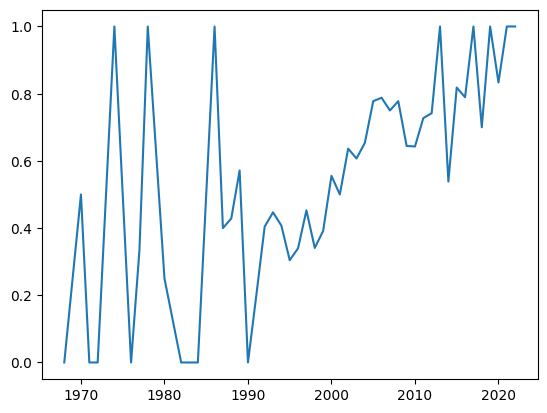

In [125]:
_, axe = plt.subplots()
# axe.plot(pass3[:, 0], pass3[:, 1])
axe.plot(pass3[:, 0], pass3[:, 2])

In [126]:
filter1 = pass3[:, 0] >= 1990
pass4 = pass3[filter1]
pass4

array([[1990.   ,    0.   ,    0.   ],
       [1991.   ,    2.   ,    0.2  ],
       [1992.   ,   19.   ,    0.404],
       [1993.   ,   21.   ,    0.447],
       [1994.   ,   11.   ,    0.407],
       [1995.   ,    7.   ,    0.304],
       [1996.   ,   17.   ,    0.34 ],
       [1997.   ,   24.   ,    0.453],
       [1998.   ,   15.   ,    0.341],
       [1999.   ,    9.   ,    0.391],
       [2000.   ,   10.   ,    0.556],
       [2001.   ,   13.   ,    0.5  ],
       [2002.   ,   14.   ,    0.636],
       [2003.   ,   17.   ,    0.607],
       [2004.   ,   17.   ,    0.654],
       [2005.   ,   21.   ,    0.778],
       [2006.   ,   26.   ,    0.788],
       [2007.   ,   18.   ,    0.75 ],
       [2008.   ,   28.   ,    0.778],
       [2009.   ,   29.   ,    0.644],
       [2010.   ,   18.   ,    0.643],
       [2011.   ,   16.   ,    0.727],
       [2012.   ,   23.   ,    0.742],
       [2013.   ,    9.   ,    1.   ],
       [2014.   ,    7.   ,    0.538],
       [2015.   ,    9.  

[[1.    0.885]
 [0.885 1.   ]]


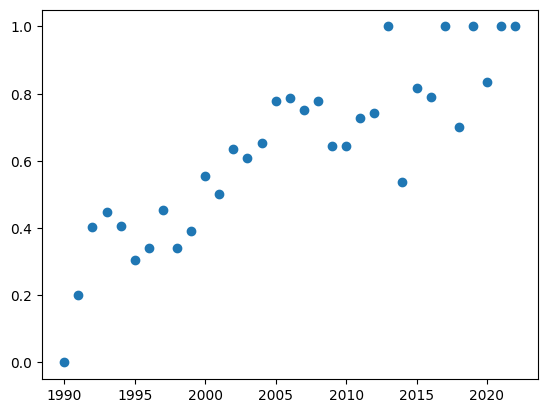

In [141]:
_, axe = plt.subplots()
# axe.plot(pass4[:, 0], pass4[:, 1])
axe.scatter(pass4[:, 0], pass4[:, 2])
print(np.corrcoef(pass4[:,0], pass4[:,2]))

*** 육교연장
중앙값: 39.6
quantile: [30.  39.6 56. ]
iqr: 26.0
upper: 95.0
lower: -9.0


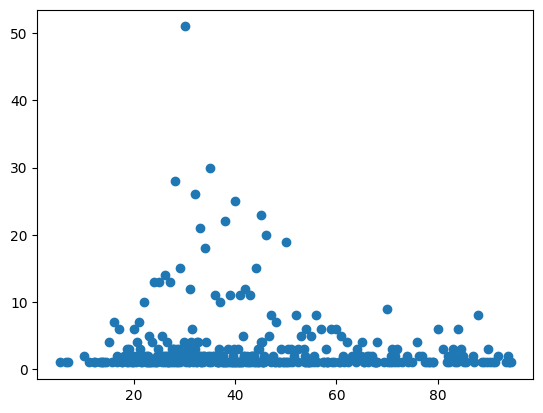

In [139]:
# iqr, outliers (이상치)

i = 7
print('***', np_data[0,i])
sub_data = np_data[1:, i]
filter1 = (sub_data != '') & (sub_data != '0') & (sub_data != '0.0')
sub_data_f = sub_data[filter1].astype(float)

# print('최소: ' , np.min(sub_data_f))
# print('최대: ' , np.max(sub_data_f))
# print('평균: ' , np.mean(sub_data_f))
# print('표준편차: ' , np.std(sub_data_f))

print('중앙값:', np.median(sub_data_f))
print('quantile:', np.quantile(sub_data_f, [.25, .5, .75]))
q25, q50, q75 = np.quantile(sub_data_f, [.25, .5, .75])
iqr = q75 - q25
print('iqr:', iqr)
print('upper:', q75 + 1.5 * iqr)
print('lower:', q25 - 1.5 * iqr)


sub_data_cut = sub_data_f[sub_data_f<95.0]

val, cnt = np.unique(sub_data_cut, return_counts = True)
_, axe = plt.subplots()
axe.scatter(val, cnt)

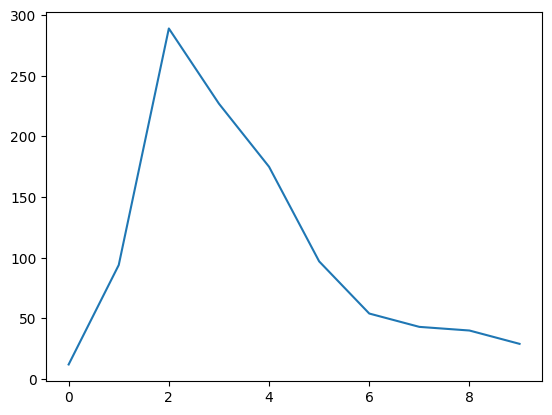

In [140]:
sub_data_cut = sub_data_f[sub_data_f<95.0]

h_cnt, h_bins = np.histogram(sub_data_cut, bins = 10)

val, cnt = np.unique(sub_data_cut, return_counts = True)
_, axe = plt.subplots()
axe.plot(np.arange(10), h_cnt)